<a href="https://colab.research.google.com/github/CastilloGabriela/Hands-On-Data-Preprocessing-in-Python/blob/main/Actividad7PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 7**
Análisis de Componentes Principales (PCA)

---

*   NOMBRE: NANCY GABRIELA GONZALEZ CASTILLO  
*   NOMBRE: Rodia Zuriel Tejeda Moreno  
*   NOMBRE: Dafne Avelín Durón Castán         
*   MATRÍCULA: A01794546
*   MATRÍCULA: A01260437 
*   MATRÍCULA: A00823833  



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/semana 7" #Gaby
#DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analitica de datos/Semana 7" #Rodia
#DIR = "/content/drive/MyDrive/Colab Notebooks/Ciencia y Analítica de datos/Semana 7" #Dafne
os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
cereals_df = pd.read_csv('Cereals.csv')
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


In [5]:
cereals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB


# **Parte 1**. EDA y preprocesamiento

1. Obtén estadísticas descriptivas para todas las variables del dataframe. 

In [6]:
print("Estadísticas descriptivas de variables cuantitativas:\n", cereals_df.describe(), '\n')
print("Estadísticas descriptivas de variables categóricas:\n", cereals_df.describe(include = "object"), '\n')

Estadísticas descriptivas de variables cuantitativas:
          calories    protein        fat      sodium      fiber      carbo  \
count   77.000000  77.000000  77.000000   77.000000  77.000000  76.000000   
mean   106.883117   2.545455   1.012987  159.675325   2.151948  14.802632   
std     19.484119   1.094790   1.006473   83.832295   2.383364   3.907326   
min     50.000000   1.000000   0.000000    0.000000   0.000000   5.000000   
25%    100.000000   2.000000   0.000000  130.000000   1.000000  12.000000   
50%    110.000000   3.000000   1.000000  180.000000   2.000000  14.500000   
75%    110.000000   3.000000   2.000000  210.000000   3.000000  17.000000   
max    160.000000   6.000000   5.000000  320.000000  14.000000  23.000000   

          sugars      potass    vitamins      shelf     weight       cups  \
count  76.000000   75.000000   77.000000  77.000000  77.000000  77.000000   
mean    7.026316   98.666667   28.246753   2.207792   1.029610   0.821039   
std     4.378656   7

Genera algunos gráficos para familiarizarte con el conjunto de datos. Al menos deberás incluir los que te permitan responder los siguientes cuestionamientos:

**Nota.** Debes responder de manera explícita las preguntas, apoyándote de los resultados observados de cada gráfico. 

2a) ¿Cuál es la frecuencia o conteo de cada categoría para las variables: `mfr` y `shelf` (por separado)? 

****

In [7]:
#KELOGS Y GENERAL MILLS son los fabricantes mas repetitivos en los datos 
cereals_df['mfr'].value_counts()

K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: mfr, dtype: int64

<AxesSubplot:xlabel='mfr', ylabel='count'>

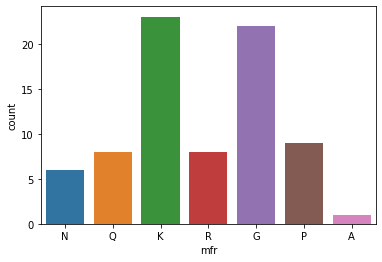

In [8]:
sns.countplot(x='mfr',data=cereals_df)

In [9]:
# Otro método podría ser group by pero nos arroja resultados con el conteo de todas las columnas
# cereals_df.groupby(['mfr']).count()

In [10]:
# el estante con mayor cantidad de productos es el 3
cereals_df['shelf'].value_counts()

3    36
2    21
1    20
Name: shelf, dtype: int64

<AxesSubplot:xlabel='shelf', ylabel='count'>

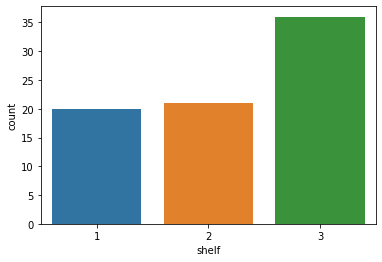

In [11]:
sns.countplot(x='shelf',data=cereals_df)

2b) Combina los resultados previos para observar, de cada fabricante, cuántos productos tiene en cada estante. 

<AxesSubplot:xlabel='mfr', ylabel='count'>

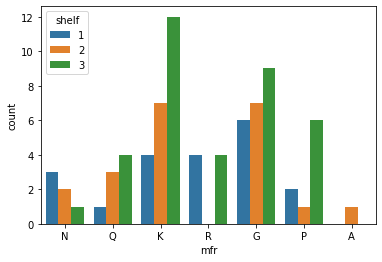

In [12]:
sns.countplot(x='mfr',hue='shelf',data=cereals_df)
#K y G son los fabricantes con mayor cantidad de productos en los estantes y sus productos estan mayormente almacenados en el estante 3.

In [13]:
cereals_df.loc[:,['shelf','mfr']].value_counts()

shelf  mfr
3      K      12
       G       9
2      K       7
       G       7
1      G       6
3      P       6
       Q       4
1      K       4
3      R       4
1      R       4
2      Q       3
1      N       3
       P       2
2      N       2
       A       1
       P       1
1      Q       1
3      N       1
dtype: int64

 3a) ¿Cuál es el rango más frecuente de la variable `rating`?

In [31]:
cereals_df['rating'].mode()[0]

18.042851

3b) ¿Cuáles son los 10 cereales mejor evaluados y a qué fabricante corresponden? 

In [32]:
from pandas._config import dates
cereals_df.nlargest(10, columns=['rating']).loc[:,['name','rating','mfr']]

# o cereals_df.sort_values(by=["rating"], ascending=False).loc[:,['name','rating','mfr']].head(10)

,name,rating,mfr
3,All-Bran_with_Extra_Fiber,93.704912,K
64,Shredded_Wheat_'n'Bran,74.472949,N
65,Shredded_Wheat_spoon_size,72.801787,N
0,100%_Bran,68.402973,N
63,Shredded_Wheat,68.235885,N
20,Cream_of_Wheat_(Quick),64.533816,N
55,Puffed_Wheat,63.005645,Q
54,Puffed_Rice,60.756112,Q
50,Nutri-grain_Wheat,59.642837,K
2,All-Bran,59.425505,K


4a) Compara la distribución de las calorías según el fabricante, por medio de boxplots. 

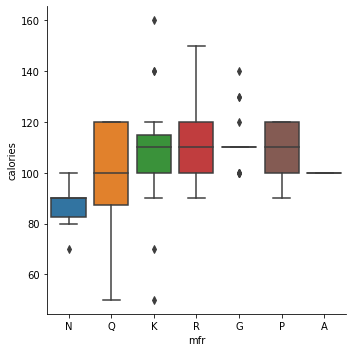

In [33]:
sns.catplot(data=cereals_df, x="mfr", y="calories", kind="box")
# o sns.boxplot(x="mfr", y="calories",data=cereals_df)

4b) ¿Cuáles son las dos variables que tienen mayor correlación con `rating`? 

Las variables que tienen mayor correlación negativa con rating son:
- **calories**
- **sugars**

Las variables que tienen mayor correlación positiva con rating son:
- **fiber**
- **protein**

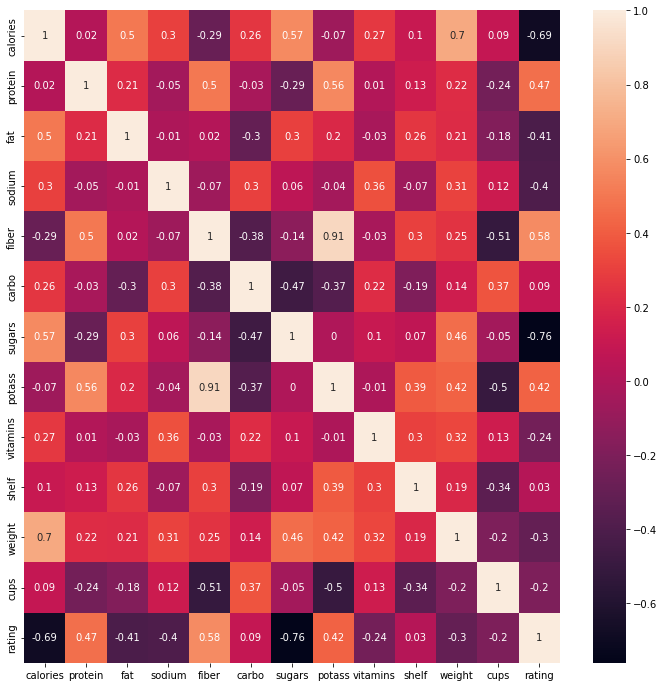

In [34]:
plt.figure(figsize=(12, 12))
correlation = cereals_df.corr(method='pearson')
sns.heatmap(round(correlation,2), annot=True)
plt.show()

In [35]:
cereals_df.corr()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.257638,0.566533,-0.072063,0.265356,0.097234,0.696091,0.087200,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.025012,-0.291853,0.563706,0.007335,0.133865,0.216158,-0.244469,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.300003,0.302497,0.200445,-0.031156,0.263691,0.214625,-0.175892,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.297687,0.058866,-0.042632,0.361477,-0.069719,0.308576,0.119665,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.380357,-0.138760,0.911528,-0.032243,0.297539,0.247226,-0.513061,0.584160
carbo,0.257638,-0.025012,-0.300003,0.297687,-0.380357,1.000000,-0.471184,-0.365003,0.219202,-0.192650,0.138467,0.367460,0.088712
sugars,0.566533,-0.291853,0.302497,0.058866,-0.138760,-0.471184,1.000000,0.001414,0.098231,0.068377,0.455844,-0.048961,-0.763902
potass,-0.072063,0.563706,0.200445,-0.042632,0.911528,-0.365003,0.001414,1.000000,-0.005427,0.385784,0.419933,-0.501607,0.416009
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.219202,0.098231,-0.005427,1.000000,0.299262,0.320324,0.128405,-0.240544
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.192650,0.068377,0.385784,0.299262,1.000000,0.190762,-0.335269,0.025159


5. Elimina todos los registros con algún dato faltante y reinicia el índice del dataframe para que quede con valores consecutivos. 

In [36]:
cereals_df = cereals_df.dropna()
cereals_df.reset_index(drop=True, inplace=True)
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
70,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
71,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
72,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 2**. Ingeniería de características

6. Considerando que `rating` es la variable de salida, almacénala en una variable `y` y separa los predictores **numéricos** en `x`. Escala los valores de `x` y aplica `PCA` para proyectar los datos en el nuevo espacio de vectores. 

In [37]:
y = cereals_df.loc[:,'rating'] # variable de salida
x = cereals_df.select_dtypes(include=['int', 'float']) # predictores numérico
x = x.iloc[:,0:-1] # quitar la variable de salida
total_components = x.shape[1]

In [38]:
# escalando valores de x
from sklearn.preprocessing import StandardScaler
escalar = StandardScaler()
x_scaled = escalar.fit_transform(x)
x_scaled[0:5]

array([[-1.87865227,  1.3911796 ,  0.        , -0.39369182,  3.25070642,
        -2.51720557, -0.25594026,  2.57800107, -0.18308346,  0.94840141,
        -0.20220332, -2.09989497],
       [ 0.65821393,  0.45529514,  4.        , -1.79257173, -0.0729865 ,
        -1.74106718,  0.2060007 ,  0.51828763, -1.31209813,  0.94840141,
        -0.20220332,  0.76191901],
       [-1.87865227,  1.3911796 ,  0.        ,  1.18765068,  2.8352448 ,
        -1.99977998, -0.48691074,  3.14619788, -0.18308346,  0.94840141,
        -0.20220332, -2.09989497],
       [-2.89339875,  1.3911796 , -1.        , -0.27205009,  4.91255287,
        -1.74106718, -1.64176313,  3.28824708, -0.18308346,  0.94840141,
        -0.20220332, -1.37376306],
       [ 0.15084069, -0.48058932,  1.        ,  0.21451684, -0.28071731,
        -1.0942852 ,  0.66794165, -0.40503219, -0.18308346, -1.47165737,
        -0.20220332, -0.30592203]])

In [39]:
# PCA
from sklearn.decomposition import PCA
pca = PCA()
x_projected = pca.fit_transform(x_scaled)
x_projected = pd.DataFrame(x_projected)
x_projected.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11
0,4.870399,2.934238,-0.055266,0.244647,-1.102035,0.904575,-0.235388,-0.247787,-0.124799,0.046331,0.238706,0.021342
1,1.761110,-0.210993,-3.014058,-0.494129,3.275506,1.065041,0.489640,0.895201,-0.835394,-0.595071,0.069954,-0.089523
2,4.727161,2.402254,0.869028,-0.095823,-1.357388,1.393861,-1.210340,0.182089,0.139267,0.090776,-0.488302,-0.035570
3,5.142814,4.401826,1.883153,0.209854,-1.662387,0.955808,0.289695,0.865569,-0.682678,0.099300,0.708471,0.108198
4,-0.332394,-0.284619,-1.490929,-0.944313,-0.311262,0.828872,-0.493652,-0.808361,-0.712896,-0.100511,0.093129,-0.076342


In [40]:
np.cumsum(pca.explained_variance_ratio_)

array([0.2766149 , 0.49721239, 0.64604788, 0.7308454 , 0.81286864,
       0.87035019, 0.92533733, 0.96000956, 0.98615378, 0.99380355,
       0.99849465, 1.        ])

7. Obtén la curva del porcentaje de varianza acumulada y determine el número mínimo de componentes principales que explique más del 90% de la varianza. Imprime la información de dichos componentes. 

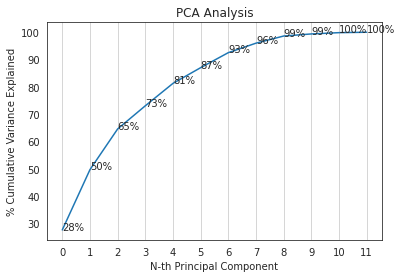

In [41]:
sns.set_style('white')

plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.title('PCA Analysis')
plt.xlabel('N-th Principal Component')
plt.ylabel('% Cumulative Variance Explained')
plt.xticks(np.arange(0,total_components,1))
plt.grid(axis = 'x')

labels = np.cumsum(pca.explained_variance_ratio_)*100
for i in range(total_components):
  plt.text(i,labels[i],str(format(labels[i],'.0f'))+'%')


In [42]:
# Número mínimo de componentes principales que explique más del 90% de la varianza: 6
num_components = 6
pc_df = pd.DataFrame(abs(pca.components_[:num_components]), columns = x.columns, index=['Principal component {}'.format(i) for i in range(1, num_components + 1)])
pc_df

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
Principal component 1,0.036594,0.330888,0.212549,0.050894,0.458623,0.268609,0.081440,0.502603,0.018839,0.308929,0.257160,0.371154
Principal component 2,0.571142,0.045367,0.249143,0.304684,0.201029,0.175660,0.364844,0.070345,0.300574,0.065114,0.448962,0.106553
Principal component 3,0.077927,0.326405,0.291274,0.343108,0.173912,0.513002,0.495338,0.130460,0.327563,0.000546,0.122030,0.082695
Principal component 4,0.164032,0.281265,0.124324,0.168916,0.075295,0.071305,0.016033,0.112708,0.594798,0.667703,0.160396,0.030683
Principal component 5,0.186667,0.372134,0.597422,0.292344,0.229653,0.191830,0.360371,0.124888,0.105582,0.265485,0.232905,0.115826
Principal component 6,0.196806,0.176822,0.299822,0.462005,0.084635,0.446257,0.061289,0.068499,0.279949,0.133268,0.316544,0.464295


In [43]:
new_data = x_projected.iloc[:,0:num_components]
new_data.columns = ['PC{}'.format(i) for i in range(1, num_components + 1)]
new_data

,PC1,PC2,PC3,PC4,PC5,PC6
0,4.870399,2.934238,-0.055266,0.244647,-1.102035,0.904575
1,1.761110,-0.210993,-3.014058,-0.494129,3.275506,1.065041
2,4.727161,2.402254,0.869028,-0.095823,-1.357388,1.393861
3,5.142814,4.401826,1.883153,0.209854,-1.662387,0.955808
4,-0.332394,-0.284619,-1.490929,-0.944313,-0.311262,0.828872
...,...,...,...,...,...,...
69,-1.059199,-0.475067,1.161330,0.495373,0.749484,-0.773891
70,-1.595568,-0.574653,-1.671901,0.380863,-0.489233,0.116453
71,-0.134252,0.612590,1.181098,-1.357046,-0.190222,0.163728
72,-0.674537,0.568589,1.163186,-1.330649,0.088594,0.644712


8. ¿Cuáles son las tres variables más importantes en el cálculo del primer componente?


Text(0, 0.5, 'feature importance for PC1')

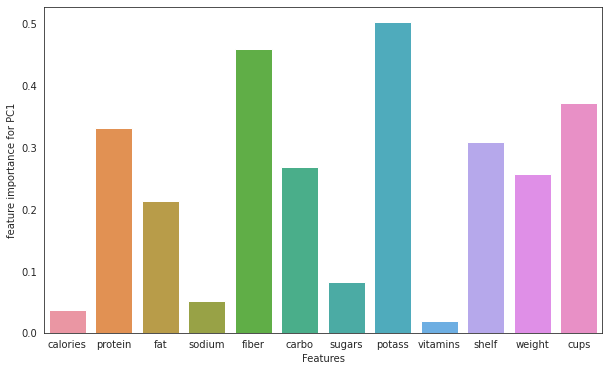

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=pc_df.iloc[0:1],ci=None)
plt.xlabel('Features')
plt.ylabel('feature importance for PC1')

# Las tres variables más importantes en el cálculo del primer componente son: fiber, potass y cups.

9. ¿Todas las variables categóricas son predictores? Aplica una técnica de encoding a las que sí lo sean. Justifica la elección de tu técnica. 

In [45]:
cereals_df['type'].value_counts()
# La variable 'type' no es predictora al tener solamente un record

C    73
H     1
Name: type, dtype: int64

In [46]:
# Se decidió aplicar One-Hot encoding a la variable mfr, pues esta es una variable categórica nominal que no tiene un orden natural o lógico,
# y se buscó evitar forzar una relación ordinal (usando ordinal encoding) que podría causar resultados inesperados en el modelo.
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
one_hot = encoder.fit_transform(cereals_df[['mfr']])
one_hot_df = pd.DataFrame(one_hot, columns=encoder.get_feature_names(['mfr']))
one_hot_df

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
69,0.0,1.0,0.0,0.0,0.0,0.0,0.0
70,0.0,1.0,0.0,0.0,0.0,0.0,0.0
71,0.0,0.0,0.0,0.0,0.0,0.0,1.0
72,0.0,1.0,0.0,0.0,0.0,0.0,0.0


10. Conjunta, en un dataframe, las valores proyectados en los componentes seleccionados (mínimo), las transformaciones obtenidas de las variables categóricas que serán predictores y la variable de salida. Almacena el dataframe resultante en archivo. 

In [47]:
data = pd.concat([new_data, one_hot_df, pd.DataFrame(y)], axis=1)
data

,PC1,PC2,PC3,PC4,PC5,PC6,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,rating
0,4.870399,2.934238,-0.055266,0.244647,-1.102035,0.904575,0.0,0.0,0.0,1.0,0.0,0.0,0.0,68.402973
1,1.761110,-0.210993,-3.014058,-0.494129,3.275506,1.065041,0.0,0.0,0.0,0.0,0.0,1.0,0.0,33.983679
2,4.727161,2.402254,0.869028,-0.095823,-1.357388,1.393861,0.0,0.0,1.0,0.0,0.0,0.0,0.0,59.425505
3,5.142814,4.401826,1.883153,0.209854,-1.662387,0.955808,0.0,0.0,1.0,0.0,0.0,0.0,0.0,93.704912
4,-0.332394,-0.284619,-1.490929,-0.944313,-0.311262,0.828872,0.0,1.0,0.0,0.0,0.0,0.0,0.0,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,-1.059199,-0.475067,1.161330,0.495373,0.749484,-0.773891,0.0,1.0,0.0,0.0,0.0,0.0,0.0,39.106174
70,-1.595568,-0.574653,-1.671901,0.380863,-0.489233,0.116453,0.0,1.0,0.0,0.0,0.0,0.0,0.0,27.753301
71,-0.134252,0.612590,1.181098,-1.357046,-0.190222,0.163728,0.0,0.0,0.0,0.0,0.0,0.0,1.0,49.787445
72,-0.674537,0.568589,1.163186,-1.330649,0.088594,0.644712,0.0,1.0,0.0,0.0,0.0,0.0,0.0,51.592193


In [48]:
data.to_csv('data_processed.csv', index=False)